<a href="https://colab.research.google.com/github/PoojithaNarayan/covid19/blob/main/Copy_of_Covid19__Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/covid detection")

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',
           input_shape=(224,224,3)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))

model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:

train_datagen = image.ImageDataGenerator(rescale = 1./255,
                                         width_shift_range=0.1,
                         		             height_shift_range=0.1,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True)

test_datagen = image.ImageDataGenerator(rescale=1./255)

In [ ]:
 
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/covid detection/Dataset-20210403T172600Z-001/Dataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/covid detection/Dataset-20210403T172600Z-001/Dataset/Valid',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
his = model.fit(
    train_generator,
    steps_per_epoch=5,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/20
5/5 [==============================] - 174s 26s/step - loss: 1.2174 - accuracy: 0.5213 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/20
5/5 [==============================] - 7s 2s/step - loss: 0.6915 - accuracy: 0.5597 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 3/20
5/5 [==============================] - 8s 2s/step - loss: 0.6795 - accuracy: 0.5554 - val_loss: 0.6695 - val_accuracy: 0.7000
Epoch 4/20
5/5 [==============================] - 8s 2s/step - loss: 0.5763 - accuracy: 0.7431 - val_loss: 0.4050 - val_accuracy: 0.9833
Epoch 5/20
5/5 [==============================] - 8s 2s/step - loss: 0.4979 - accuracy: 0.7724 - val_loss: 0.4810 - val_accuracy: 0.7833
Epoch 6/20
5/5 [==============================] - 8s 2s/step - loss: 0.4605 - accuracy: 0.8084 - val_loss: 0.5816 - val_accuracy: 0.9667
Epoch 7/20
5/5 [==============================] - 8s 2s/step - loss: 0.4258 - accuracy: 0.8909 - val_loss: 0.3636 - val_accuracy: 0.9833
Epoch 8/20
5/5 [======================

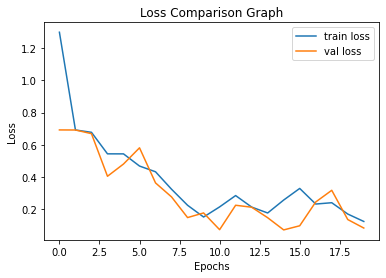

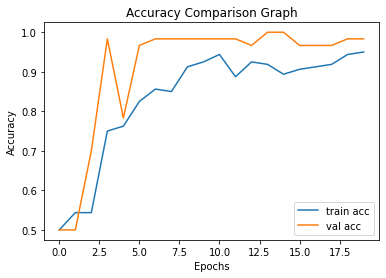

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(his.history['loss'], label='train loss')
plt.plot(his.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Comparison Graph")
plt.legend()
plt.show()
plt.savefig('loss')

# accuracies
plt.plot(his.history['accuracy'], label='train acc')
plt.plot(his.history['val_accuracy'], label='val acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy Comparison Graph")
plt.legend()
plt.show()
plt.savefig('Accuracy')

No need to train everytime you run, you can skip above steps , after sucessfully saving the model.

In [ ]:

model.save("covid_detector.h5")

In [ ]:

import tensorflow 
from tensorflow.keras.models import load_model

#loads the saved model , this will enough to test your test images.
model = load_model("covid_detector.h5")


In [ ]:
def preprocess_image(image):
  img = cv2.resize(image,(224,224))

  img = img.astype("float") / 255.0
  img = img_to_array(img)
  img = np.expand_dims(img,axis=0)

  return img

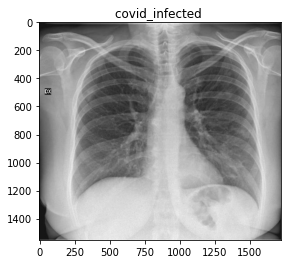

In [ ]:
import cv2

#comment it out the unnecessary code

img1 = cv2.imread("fig1.png") 
img2 = cv2.imread("fig2.jpeg") #loads the image1 , if you need only image2 just comment this line.

#defining classes 
classes = ['covid_infected','Normal']

prep_img = preprocess_image(img1)

# model prediction
result = model.predict(prep_img)

## get label with max accuracy
if result>0.5:
  label = 1
else:
  label=0


label_name = classes[label]

plt.figure()
#this will print the image , if you need 1st image change img2 to img1
plt.imshow(img1)
plt.title('{} '.format(label_name))
# here chane name of image accordingly.
plt.savefig("fig1_res")
plt.show()

